In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog.csv')
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,BLK,TOV,PF,PTS,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.2,0.7,1.0,3.2,-5.93,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,1.2,1.9,3.3,14.6,0.74,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.3,0.9,2.4,2.9,-7.38,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.2,2.9,1.4,5.2,-7.20,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,0.2,2.7,2.4,15.8,11.13,2.8,3.7,1.5,0.2,10.9


In [2]:
df = df.drop(['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS'], axis=1)

In [3]:
df1 = pd.read_csv('2019DraftClass.csv')
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Bryce Aiken,Harvard,58,34,29.4,5.0,12.4,0.406,2.9,6.1,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
1,Nickeil Alexander-Walker,Virginia Tech,67,67,29.9,4.7,10.1,0.464,3.0,5.6,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
2,Al-Wajid Aminu,North Florida,34,26,26.0,3.6,6.7,0.542,3.4,5.9,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
3,Desmond Bane,TCU,109,82,28.7,4.2,8.2,0.516,2.8,4.8,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
4,RJ Barrett,Duke,38,38,35.3,8.4,18.5,0.454,6.5,12.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97


In [5]:
df2 = df.append(df1, ignore_index = True)
df2.tail()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
978,Kris Wilkes,UCLA,66.0,65.0,30.8,5.5,12.6,0.436,3.6,7.1,...,1.2,3.6,4.8,1.7,0.7,0.5,1.6,2.3,15.5,6.82
979,Emmitt Williams,LSU,34.0,8.0,19.7,2.6,4.3,0.614,2.6,4.1,...,2.6,2.8,5.4,0.4,0.3,0.6,1.1,1.9,7.0,9.15
980,Grant Williams,Tennessee,104.0,101.0,28.9,5.3,10.2,0.516,5.0,9.2,...,2.5,4.0,6.5,2.1,0.9,1.5,2.1,3.2,15.7,10.15
981,Zion Williamson,Duke,33.0,33.0,30.0,9.0,13.2,0.680,8.2,11.0,...,3.5,5.4,8.9,2.1,2.1,1.8,2.4,2.1,22.6,11.97
982,Kenny Wooten,Oregon,70.0,38.0,21.8,2.6,4.1,0.634,2.6,4.1,...,1.4,3.3,4.7,0.5,0.5,2.4,1.1,2.6,6.4,5.49


In [6]:
df2 = df2.set_index('Name')
df2 = df2.drop(['School'], axis=1)
df2.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0.6,0.9,1.5,0.2,0.2,0.2,0.7,1.0,3.2,-5.93
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,2.9,3.4,8.9,0.6,1.1,1.2,1.9,3.3,14.6,0.74
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0.7,2.0,2.7,0.4,0.6,0.3,0.9,2.4,2.9,-7.38
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0.3,3.6,3.1,3.4,0.8,0.2,2.9,1.4,5.2,-7.20
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,0.8,2.8,3.8,2.2,1.9,0.2,2.7,2.4,15.8,11.13


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


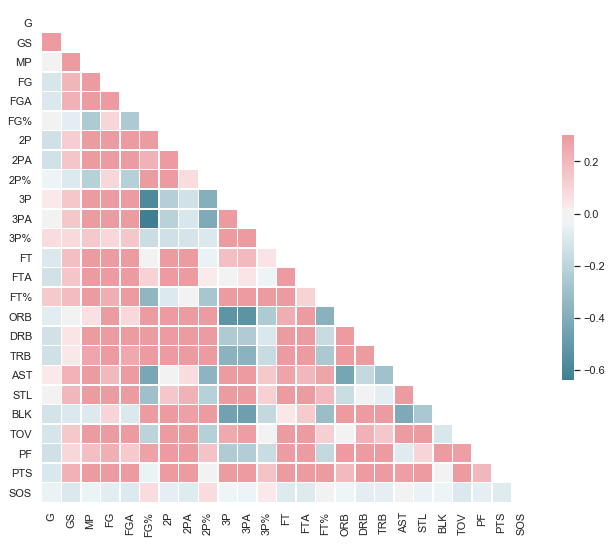

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

## Data Clustering

In [9]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [10]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
subSpace = TSNE().fit_transform(df2.values)
#subSpace = PCA().fit_transform(df3.values)

### K-Means

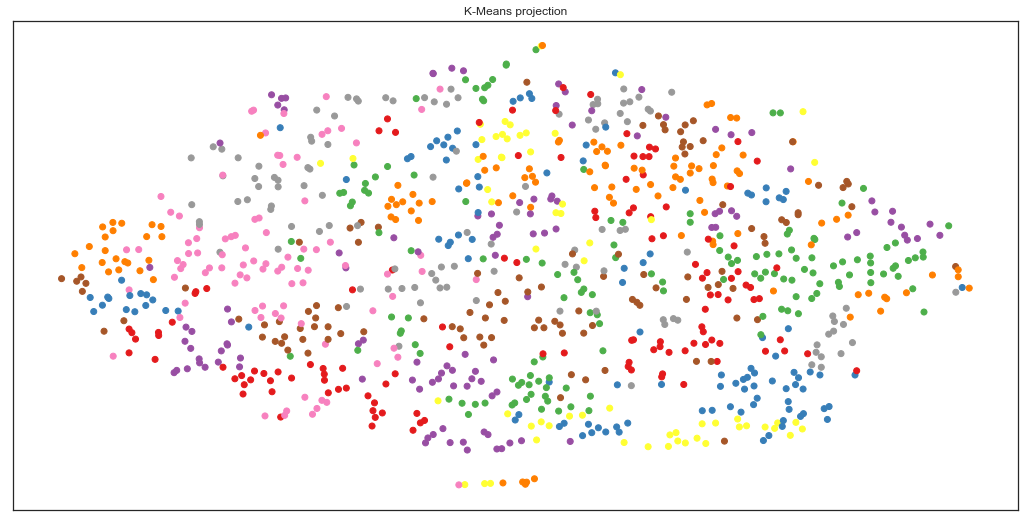

In [19]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=60, max_iter= 10000, n_init=100).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'K-Means projection',60)

In [20]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.868495,-1.942153,-3.518929,-2.446230,-2.412762,-0.150354,-1.927948,-2.067621,-0.045807,-1.040380,...,-1.987181,-1.725434,-1.368845,-1.730732,-0.725978,-1.845803,-2.386757,-2.379129,-2.961529,39
Ashraf Amaya,0.993155,1.517915,0.816330,0.686468,0.015798,1.633683,1.408351,1.019828,1.286821,-1.171663,...,-0.219399,1.748164,-1.101468,0.097978,0.735793,-0.164353,2.224214,0.539585,-1.329206,13
James Cotton,-1.990961,-1.912831,-2.603292,-2.669994,-2.583788,-0.548731,-2.005536,-2.067621,-0.815352,-1.302946,...,-1.209357,-1.162148,-1.235157,-0.917972,-0.579801,-1.565562,0.419921,-2.455937,-3.316382,12
Eddie Robinson,0.609874,0.198397,0.891076,-1.924113,-1.523431,-1.865107,-1.462418,-1.179451,-2.054133,-0.909097,...,-0.077977,-0.974386,0.770171,-0.511592,-0.725978,1.236855,-1.584849,-1.867074,-3.272332,19
Gilbert Arenas,-0.594723,-1.033152,0.498660,0.910232,0.939335,-0.115712,0.554879,0.554595,0.198196,0.666298,...,-0.643667,-0.645802,-0.031960,1.723497,-0.725978,0.956613,0.419921,0.846818,1.213498,18


In [21]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Andrew Bogut,-0.649478,-0.006861,0.909763,1.656112,0.528874,2.257229,2.339411,1.611941,1.943750,-1.040380,...,2.750475,2.780855,0.034884,-0.714782,1.320502,0.956613,0.219444,1.051640,-0.401694,44
Paul Millsap,0.007575,0.667559,1.376924,2.103641,1.041950,1.806890,2.882529,2.373230,1.268052,-1.171663,...,2.538341,3.531903,-0.900936,0.504358,1.905210,0.536251,1.823260,1.563695,-0.993932,44
Kevin Love,-1.443417,-0.886539,0.330482,1.059408,0.357848,1.495117,1.330762,0.723771,1.849903,-0.383966,...,2.326207,2.546153,-0.232493,-0.714782,1.028147,-0.024232,-0.582464,1.282065,0.376535,44
Blake Griffin,-0.649478,-0.153474,0.573406,2.029053,0.734104,2.517041,2.882529,2.034879,2.056367,-1.302946,...,3.245454,3.109439,-0.098804,0.097978,0.443439,1.096734,0.620398,1.614901,0.293328,44
Deandre Ayton,-1.552926,-0.974507,1.059254,2.625757,1.212975,2.413116,3.192882,2.246348,2.300369,-0.909097,...,3.174742,3.015558,-0.433026,-0.917972,1.759033,-0.024232,0.219444,1.947737,0.163623,44
Cletrell Pope,-1.662434,-1.297056,0.386542,0.835644,-0.086818,2.343833,1.641116,0.935240,2.037597,-1.171663,...,2.891897,3.297201,-1.034624,-0.511592,0.735793,-0.024232,2.625167,0.411571,-3.893936,44
Zion Williamson,-1.607680,-1.033152,0.405228,3.446225,1.315590,3.590927,3.736001,1.865704,4.402543,-0.383966,...,1.194827,1.748164,-0.098804,2.129877,1.612856,0.536251,-0.181510,2.587805,1.419068,44


### Agglomerative Clustering

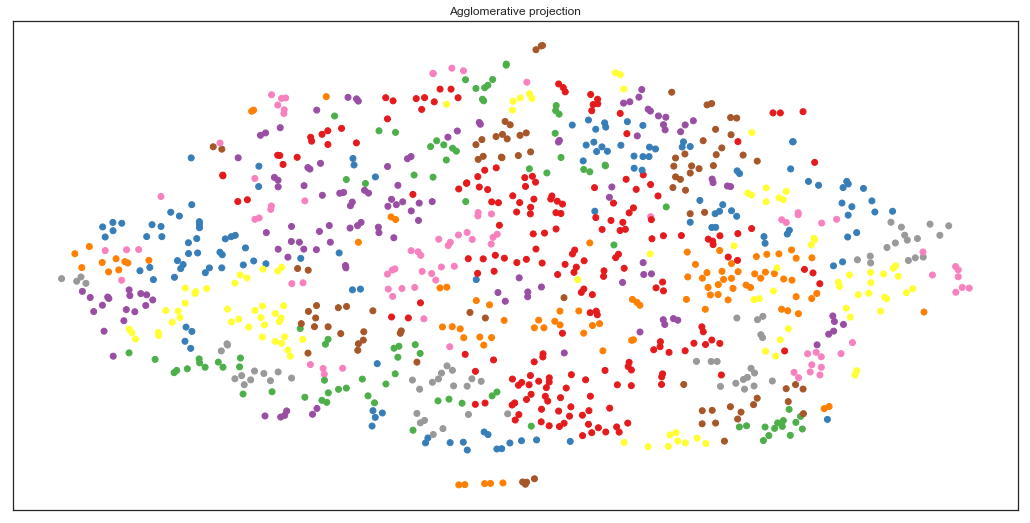

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=60).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'Agglomerative projection',60)

In [23]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.868495,-1.942153,-3.518929,-2.446230,-2.412762,-0.150354,-1.927948,-2.067621,-0.045807,-1.040380,...,-1.987181,-1.725434,-1.368845,-1.730732,-0.725978,-1.845803,-2.386757,-2.379129,-2.961529,15
Ashraf Amaya,0.993155,1.517915,0.816330,0.686468,0.015798,1.633683,1.408351,1.019828,1.286821,-1.171663,...,-0.219399,1.748164,-1.101468,0.097978,0.735793,-0.164353,2.224214,0.539585,-1.329206,36
James Cotton,-1.990961,-1.912831,-2.603292,-2.669994,-2.583788,-0.548731,-2.005536,-2.067621,-0.815352,-1.302946,...,-1.209357,-1.162148,-1.235157,-0.917972,-0.579801,-1.565562,0.419921,-2.455937,-3.316382,15
Eddie Robinson,0.609874,0.198397,0.891076,-1.924113,-1.523431,-1.865107,-1.462418,-1.179451,-2.054133,-0.909097,...,-0.077977,-0.974386,0.770171,-0.511592,-0.725978,1.236855,-1.584849,-1.867074,-3.272332,33
Gilbert Arenas,-0.594723,-1.033152,0.498660,0.910232,0.939335,-0.115712,0.554879,0.554595,0.198196,0.666298,...,-0.643667,-0.645802,-0.031960,1.723497,-0.725978,0.956613,0.419921,0.846818,1.213498,8


In [24]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Andrew Bogut,-0.649478,-0.006861,0.909763,1.656112,0.528874,2.257229,2.339411,1.611941,1.943750,-1.040380,...,2.750475,2.780855,0.034884,-0.714782,1.320502,0.956613,0.219444,1.051640,-0.401694,56
Blake Griffin,-0.649478,-0.153474,0.573406,2.029053,0.734104,2.517041,2.882529,2.034879,2.056367,-1.302946,...,3.245454,3.109439,-0.098804,0.097978,0.443439,1.096734,0.620398,1.614901,0.293328,56
Deandre Ayton,-1.552926,-0.974507,1.059254,2.625757,1.212975,2.413116,3.192882,2.246348,2.300369,-0.909097,...,3.174742,3.015558,-0.433026,-0.917972,1.759033,-0.024232,0.219444,1.947737,0.163623,56
Zion Williamson,-1.607680,-1.033152,0.405228,3.446225,1.315590,3.590927,3.736001,1.865704,4.402543,-0.383966,...,1.194827,1.748164,-0.098804,2.129877,1.612856,0.536251,-0.181510,2.587805,1.419068,56


### Affinity Propagation

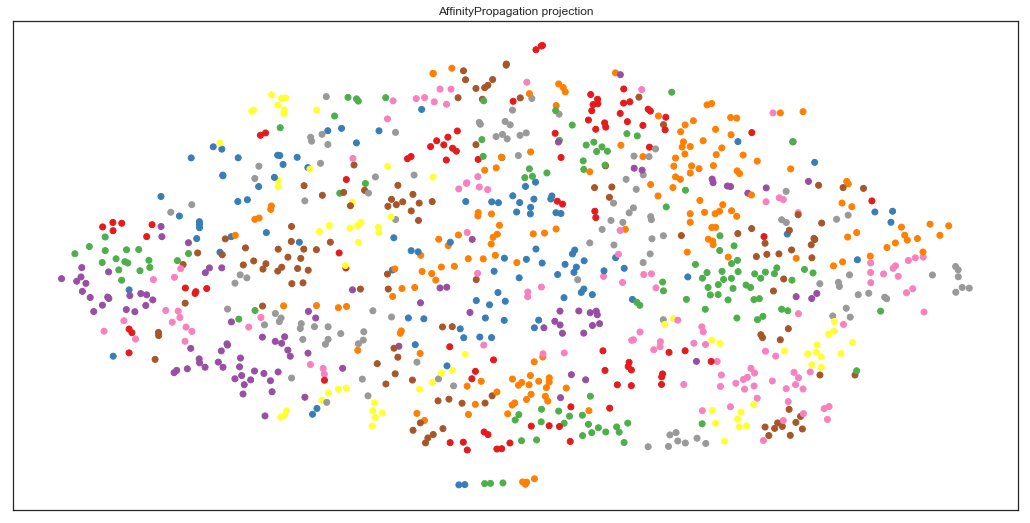

In [16]:
from sklearn.cluster import AffinityPropagation
cluster = AffinityPropagation(convergence_iter=15).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'AffinityPropagation projection',60)

In [17]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.868495,-1.942153,-3.518929,-2.446230,-2.412762,-0.150354,-1.927948,-2.067621,-0.045807,-1.040380,...,-1.987181,-1.725434,-1.368845,-1.730732,-0.725978,-1.845803,-2.386757,-2.379129,-2.961529,41
Ashraf Amaya,0.993155,1.517915,0.816330,0.686468,0.015798,1.633683,1.408351,1.019828,1.286821,-1.171663,...,-0.219399,1.748164,-1.101468,0.097978,0.735793,-0.164353,2.224214,0.539585,-1.329206,50
James Cotton,-1.990961,-1.912831,-2.603292,-2.669994,-2.583788,-0.548731,-2.005536,-2.067621,-0.815352,-1.302946,...,-1.209357,-1.162148,-1.235157,-0.917972,-0.579801,-1.565562,0.419921,-2.455937,-3.316382,53
Eddie Robinson,0.609874,0.198397,0.891076,-1.924113,-1.523431,-1.865107,-1.462418,-1.179451,-2.054133,-0.909097,...,-0.077977,-0.974386,0.770171,-0.511592,-0.725978,1.236855,-1.584849,-1.867074,-3.272332,53
Gilbert Arenas,-0.594723,-1.033152,0.498660,0.910232,0.939335,-0.115712,0.554879,0.554595,0.198196,0.666298,...,-0.643667,-0.645802,-0.031960,1.723497,-0.725978,0.956613,0.419921,0.846818,1.213498,56


In [18]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Andrew Bogut,-0.649478,-0.006861,0.909763,1.656112,0.528874,2.257229,2.339411,1.611941,1.943750,-1.040380,...,2.750475,2.780855,0.034884,-0.714782,1.320502,0.956613,0.219444,1.051640,-0.401694,25
Paul Millsap,0.007575,0.667559,1.376924,2.103641,1.041950,1.806890,2.882529,2.373230,1.268052,-1.171663,...,2.538341,3.531903,-0.900936,0.504358,1.905210,0.536251,1.823260,1.563695,-0.993932,25
Blake Griffin,-0.649478,-0.153474,0.573406,2.029053,0.734104,2.517041,2.882529,2.034879,2.056367,-1.302946,...,3.245454,3.109439,-0.098804,0.097978,0.443439,1.096734,0.620398,1.614901,0.293328,25
Ben Simmons,-1.607680,-1.062475,1.320865,1.581524,0.802514,1.512437,2.416999,2.119467,0.911433,-1.302946,...,3.457588,3.109439,1.705991,1.926687,0.151084,1.937459,1.221829,1.717312,0.202779,25
Deandre Ayton,-1.552926,-0.974507,1.059254,2.625757,1.212975,2.413116,3.192882,2.246348,2.300369,-0.909097,...,3.174742,3.015558,-0.433026,-0.917972,1.759033,-0.024232,0.219444,1.947737,0.163623,25
Zion Williamson,-1.607680,-1.033152,0.405228,3.446225,1.315590,3.590927,3.736001,1.865704,4.402543,-0.383966,...,1.194827,1.748164,-0.098804,2.129877,1.612856,0.536251,-0.181510,2.587805,1.419068,25
